In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga del dataset Iris
df = pd.read_csv(
    "iris.data",
    sep=",",
    names=["sepal length", "sepal width", "petal length", "petal width", "class"],
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Verificar valores nulos
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [5]:
# Obtener estadísticas descriptivas
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Eliminación de elementos duplicados

In [6]:
df = df.drop_duplicates()
print(df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


## Identificación y eliminacion de valores atípicos, utilizando Z-score con umbral = 3 

In [7]:
column_names = ["sepal length", "sepal width", "petal length", "petal width"]
for col in column_names:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    threshold = 3
    outliers_mask_zscore = np.abs(z_scores) > threshold

    # Imprimir la cantidad de valores atipicos
    num_outliers_zscore = outliers_mask_zscore.sum()
    print(f"Cantidad de valores atípicos en {col} =", num_outliers_zscore)

    # Que solo se mantengan las filas cuya outliers_mask_zscore sea falsa
    df = df[~outliers_mask_zscore]

# Imprimir el DataFrame final sin los valores atipicos
print("\nDataFrame without outliers (using Z-score):")
print(df)

Cantidad de valores atípicos en sepal length = 0
Cantidad de valores atípicos en sepal width = 1
Cantidad de valores atípicos en petal length = 0
Cantidad de valores atípicos en petal width = 0

DataFrame without outliers (using Z-score):
     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2    


## Visualización de Características del Iris con Colores por Especie
Este diagrama de dispersión muestra la distribución de las características del sépalo y pétalo de las flores Iris, coloreadas según su especie. Proporciona una comprensión visual de las posibles relaciones entre estas características y las clases de flores (Iris-setosa, Iris-versicolor e Iris-virginica).

Rojo: Iris-setosa
Azul: Iris-versicolor
Amarillo: Iris-virginica

Text(0.5, 1.0, 'Petal Length vs Petal Width')

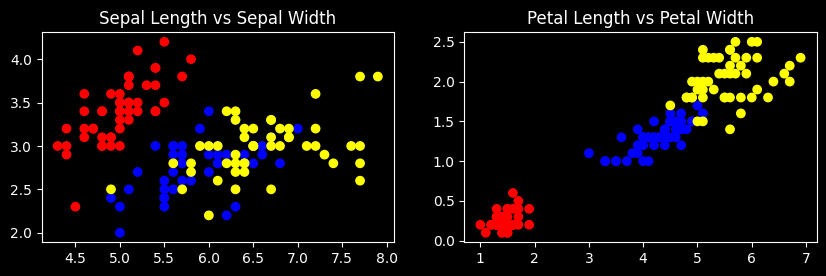

In [8]:
# Diccionario de colores
class_colors = {
    "Iris-setosa": "red",
    "Iris-versicolor": "blue",
    "Iris-virginica": "yellow",
}

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(
    df["sepal length"], df["sepal width"], c=[class_colors[x] for x in df["class"]]
)
plt.title("Sepal Length vs Sepal Width")

plt.subplot(2, 2, 2)
plt.scatter(
    df["petal length"], df["petal width"], c=[class_colors[x] for x in df["class"]]
)
plt.title("Petal Length vs Petal Width")

## Separación de Datos para Entrenamiento y Prueba

En esta etapa, se divide el conjunto de datos Iris en dos subconjuntos: entrenamiento y prueba. Se utiliza `train_test_split` de `scikit-learn` para lograr una separación aleatoria del 80% para entrenamiento (X_train, y_train) y el 20% restante para prueba (X_test, y_test). 

* `X_train`: Características de entrenamiento (sepal length, sepal width, petal length, petal width).
* `X_test`: Características de prueba.
* `y_train`: Etiquetas de clase de entrenamiento (Iris-setosa, Iris-versicolor, Iris-virginica).
* `y_test`: Etiquetas de clase de prueba.

El estado aleatorio (`random_state=42`) garantiza la reproducibilidad de la separación, permitiendo obtener resultados consistentes al ejecutar el código nuevamente.


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df.drop("class", axis=1), df["class"], test_size=0.2, random_state=42
)

In [10]:

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

## Obtener las metricas del entrenamiento con los tres algoritmos

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_metrics = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'precision': precision_score(y_test, knn_pred, average='micro'),
    'recall': recall_score(y_test, knn_pred, average='micro'),
    'f1_score': f1_score(y_test, knn_pred, average='micro'),
}
print("\n","KNN Metrics:")

for metric, value in knn_metrics.items():
    print(f"{metric}: {value}")


dt_metrics = {
    'accuracy': accuracy_score(y_test, dt_pred),
    'precision': precision_score(y_test, dt_pred, average='micro'),
    'recall': recall_score(y_test, dt_pred, average='micro'),
    'f1_score': f1_score(y_test, dt_pred, average='micro'),
}
print("\n","DT Metrics:")

for metric, value in dt_metrics.items():
    print(f"{metric}: {value}")


nb_metrics = {
    'accuracy': accuracy_score(y_test, nb_pred),
    'precision': precision_score(y_test, nb_pred, average='micro'),
    'recall': recall_score(y_test, nb_pred, average='micro'),
    'f1_score': f1_score(y_test, nb_pred, average='micro'),
}
print("\n","NB Metrics:")

for metric, value in nb_metrics.items():
    print(f"{metric}: {value}")


 KNN Metrics:
accuracy: 0.8666666666666667
precision: 0.8666666666666667
recall: 0.8666666666666667
f1_score: 0.8666666666666667

 DT Metrics:
accuracy: 0.8333333333333334
precision: 0.8333333333333334
recall: 0.8333333333333334
f1_score: 0.8333333333333334

 NB Metrics:
accuracy: 0.7666666666666667
precision: 0.7666666666666667
recall: 0.7666666666666667
f1_score: 0.7666666666666667


## Visualización de la Proporción Accuracy de los Modelos

Este gráfico de barras compara la proporción Accuracy (Accuracy) de los tres modelos entrenados (Árbol de Decisión, Naive Bayes, y KNN). Una mayor valor indica un rendimiento más consistente del modelo.

* **Barras:** Representan la proporción Accuracy de cada modelo.
* **Eje X:** Muestra los nombres de los modelos.
* **Eje Y:** Indica la proporción Accuracy.
* **Colores:** Azul, verde y naranja para diferenciar visualmente los modelos.


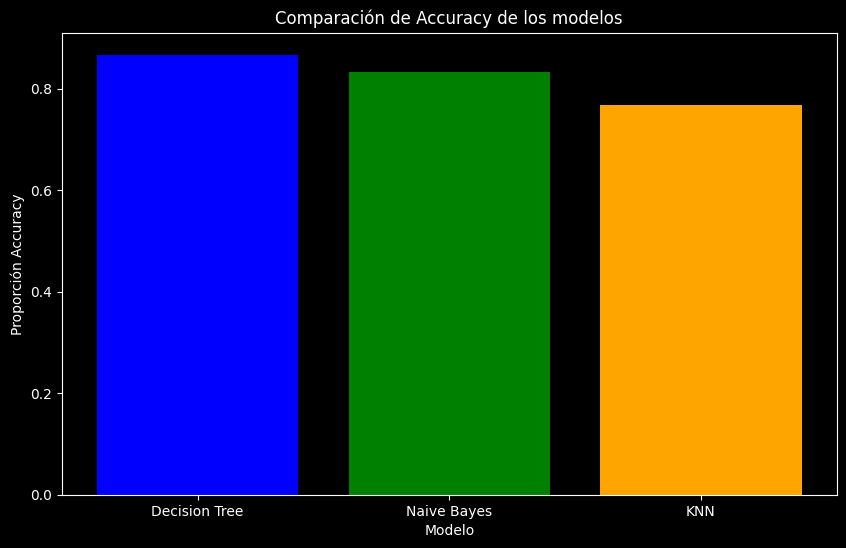

In [12]:
mean_std_ratios = [
    knn_metrics['accuracy'],
    dt_metrics['accuracy'],
    nb_metrics['accuracy'],
]

model_names = ["Decision Tree", "Naive Bayes", "KNN"]


plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_std_ratios, color=["blue", "green", "orange"])
plt.xlabel("Modelo")
plt.ylabel("Proporción Accuracy")  # Adjusted label
plt.title("Comparación de Accuracy de los modelos")


plt.show()

## Procedemos a realizar la validación cruzada de los algoritmos con K-Fold, k=5

In [13]:
# Separar características (X) y objetivo (y)
Y = df["class"]
X = df.drop(columns="class")

In [14]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()

# Evaluación del rendimiento del algoritmo KNN con validación cruzada
scores_knn = cross_val_score(knn, X, Y, cv=5)

dt = DecisionTreeClassifier()

# Evaluación del rendimiento del algoritmo de árbol de decisión con validación cruzada
scores_dt = cross_val_score(dt, X, Y, cv=5)

nb = GaussianNB()

# Evaluación del rendimiento del algoritmo Naive Bayes con validación cruzada
scores_nb = cross_val_score(nb, X, Y, cv=5)

In [15]:
# Calculate and print relevant metrics
print("Decision Tree Mean Score:", scores_dt.mean())
print("Decision Tree Standard Deviation:", scores_dt.std())

print("Naive Bayes Mean Score:", scores_nb.mean())
print("Naive Bayes Standard Deviation:", scores_nb.std())

print("KNN Mean Score:", scores_knn.mean())
print("KNN Standard Deviation:", scores_knn.std())

Decision Tree Mean Score: 0.9528735632183908
Decision Tree Standard Deviation: 0.03427523762700462
Naive Bayes Mean Score: 0.9528735632183907
Naive Bayes Standard Deviation: 0.02702494162700799
KNN Mean Score: 0.9731034482758621
KNN Standard Deviation: 0.025009972908430607


## Visualización de la Proporción (Media / Desviación Estándar) de los Modelos

Este diagrama de barras compara la proporción (Media / Desviación Estándar) de los tres modelos entrenados (Árbol de Decisión, Naive Bayes, y KNN). Esta métrica permite evaluar la consistencia del rendimiento del modelo, donde un valor más alto indica una mayor estabilidad.

* **Barras:** Representan la proporción (Media / Desviación Estándar) de cada modelo.
* **Eje X:** Muestra los nombres de los modelos.
* **Eje Y:** Indica la proporción (Media / Desviación Estándar).
* **Colores:** Azul, verde y naranja para diferenciar visualmente los modelos.


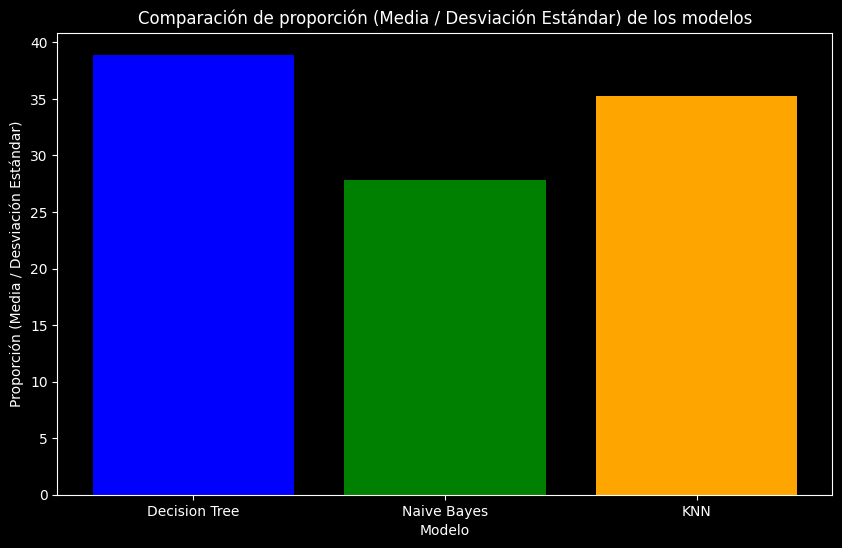

In [16]:
# Calculate mean to standard deviation ratio
mean_std_ratios = [
    scores_knn.mean() / scores_knn.std(),
    scores_dt.mean() / scores_dt.std(),
    scores_nb.mean() / scores_nb.std(),
]

# Define model names
model_names = ["Decision Tree", "Naive Bayes", "KNN"]


plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_std_ratios, color=["blue", "green", "orange"])
plt.xlabel("Modelo")
plt.ylabel("Proporción (Media / Desviación Estándar)")  # Adjusted label
plt.title("Comparación de proporción (Media / Desviación Estándar) de los modelos")

plt.show()